<a href="https://colab.research.google.com/github/gh-ita/StudentProductivity/blob/main/ProblemSolving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

In [2]:
dataset_path = '/content/student_data.csv'
student_df = pd.read_csv(dataset_path)

In [15]:
print(student_df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [16]:
student_df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Cette table contient 33 colonnes

In [21]:
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_features)
print(len(numerical_features))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


On a 16 variables numériques et 14 variables catégoriques

In [13]:
print(student_df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [14]:
print("Le nombre de valeurs manquantes est : ")
print(student_df.isnull().sum().sum())

Le nombre de valeurs manquantes est : 
0


On n'a pas de valeurs manquantes

In [23]:
student_df = student_df.drop(['guardian','schoolsup' , 'paid' , 'nursery' ,'higher' ,'romantic' ,'Dalc' ,'Walc'],1)

<ipython-input-23-9027f2bc73fb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  student_df = student_df.drop(['guardian','schoolsup' , 'paid' , 'nursery' ,'higher' ,'romantic' ,'Dalc' ,'Walc'],1)


In [29]:
print("La table contient maintenant ",len(student_df.columns.tolist()), " colonnes")
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = student_df.select_dtypes(include='object').columns.tolist()
print(numerical_features)
print("On a ",len(numerical_features)," variables numériques")
print(categorical_features)
print("On a ",len(categorical_features)," variables catégoriques")

La table contient maintenant  25  colonnes
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3']
On a  14  variables numériques
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'famsup', 'activities', 'internet']
On a  11  variables catégoriques


On a enlevé 8 variables qui n'ont pas de relation avec le contexte de notre étude. La table contient maintenant 14 variables numériques et 11 variables catégoriques.

In [37]:
encoder = OneHotEncoder()

numerical_features_df = student_df.select_dtypes(include=['float64', 'int64'])
categorical_features_df = student_df.select_dtypes(include='object')

#application du onehotencoder afin de transformer les variables categoriques en des variables numériques
categorical_tonumerical_features = encoder.fit_transform(categorical_features_df).toarray()
numerical_features_array = numerical_features_df.values

#conctanénation des deux numpy arrays, une contenant les variables numeriques et l'autre les variables categoriques transformées
student_array = np.concatenate((numerical_features_array,categorical_tonumerical_features),axis=1)
student_array.shape

(395, 44)

La nouvelle table contient 44 variables numériques

In [40]:
standarisation = StandardScaler()

student_data_standarise = standarisation.fit_transform(student_array)


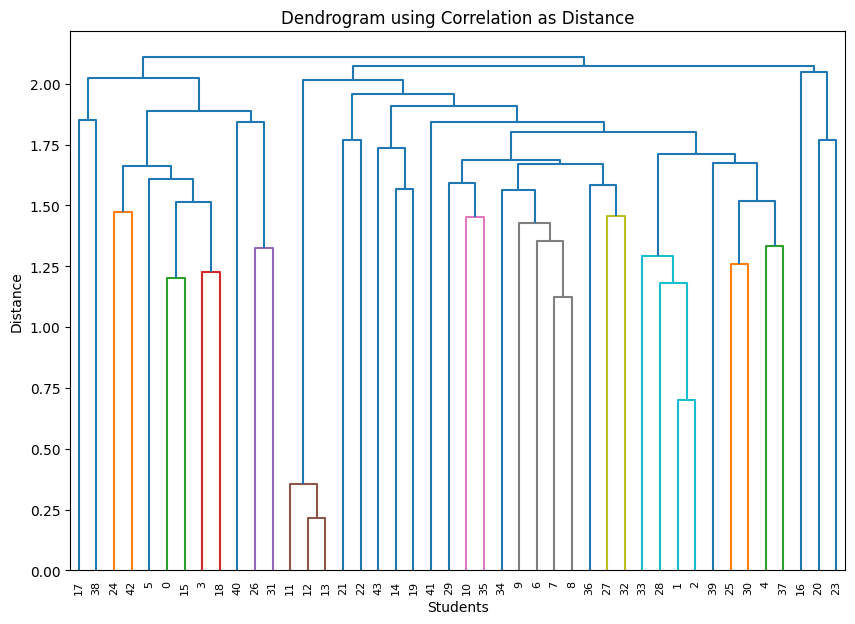

In [42]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(student_data_standarise, rowvar=False)

# Perform hierarchical clustering using correlation as distance
linkage_matrix = linkage(correlation_matrix, method='average')  # 'average' linkage method

# Plot dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram using Correlation as Distance')
plt.xlabel('Students')
plt.ylabel('Distance')
plt.show()
